<a href="https://colab.research.google.com/github/noelgith/covid-diet/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy import stats as st
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [ ]:
df = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')

In [ ]:
df = df.dropna()

In [ ]:
obese = df['Obesity']

In [ ]:
obese = obese.dropna()

In [ ]:
obese.isna().sum()

0

In [ ]:
recovered =(df['Recovered']*df['Population'])

In [ ]:
deaths = df['Deaths']*df['Population']

In [ ]:
st.ttest_ind(obese, recovered, equal_var = False)

Ttest_indResult(statistic=-3.8832882268708717, pvalue=0.0001529365199890348)

In [ ]:
data = {'Obese':obese, 'Recovered':recovered, 'Deaths':deaths}

In [ ]:
odf = pd.DataFrame(data)

In [ ]:
odf.head()

,Obese,Recovered,Deaths
0,4.5,4802700.0,240800.0
1,22.3,5087500.0,144600.0
2,26.6,7433000.0,290900.0
3,6.8,1847500.0,47500.0
5,28.5,177205900.0,4911000.0


In [ ]:
odf['Obese'] = odf['Obese'].astype('object')
odf['Recovered'] = odf['Recovered'].astype('object')
odf['Deaths'] = odf['Deaths'].astype('object')

In [ ]:
odf.dtypes

Obese        object
Recovered    object
Deaths       object
dtype: object

In [ ]:
low_obese = odf[odf['Obese']<18.0]
mid_obese = odf[(odf['Obese']>18.0) & (odf['Obese']<35.0)]
high_obese = odf[odf['Obese']>35.0]

In [ ]:
low_obese = odf[odf['Obese']<25.0]
high_obese = odf[odf['Obese']>=25.0]

In [ ]:
df.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
5,Argentina,4.2672,0.2234,19.3454,0.0,8.4102,0.9979,0.4693,6.0435,7.0421,...,4.3503,30.6559,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0,%


In [ ]:
df = df.drop('Unit (all except Population)',axis=1)

### **Performing Sperman's correlation test**

1. Correlation between diet variables and Obesity.

In [ ]:
df.columns

Index(['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population'],
      dtype='object')

In [ ]:
corr_df = df.drop(['Country','Active','Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Population'],axis=1)

In [ ]:
corr_df.columns

Index(['Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Obesity'],
      dtype='object')

In [ ]:
#function to find the correlation
def display_correlation(df):
    r = df.corr(method="spearman") #spearman's correlation call
    plt.figure(figsize=(15,12))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

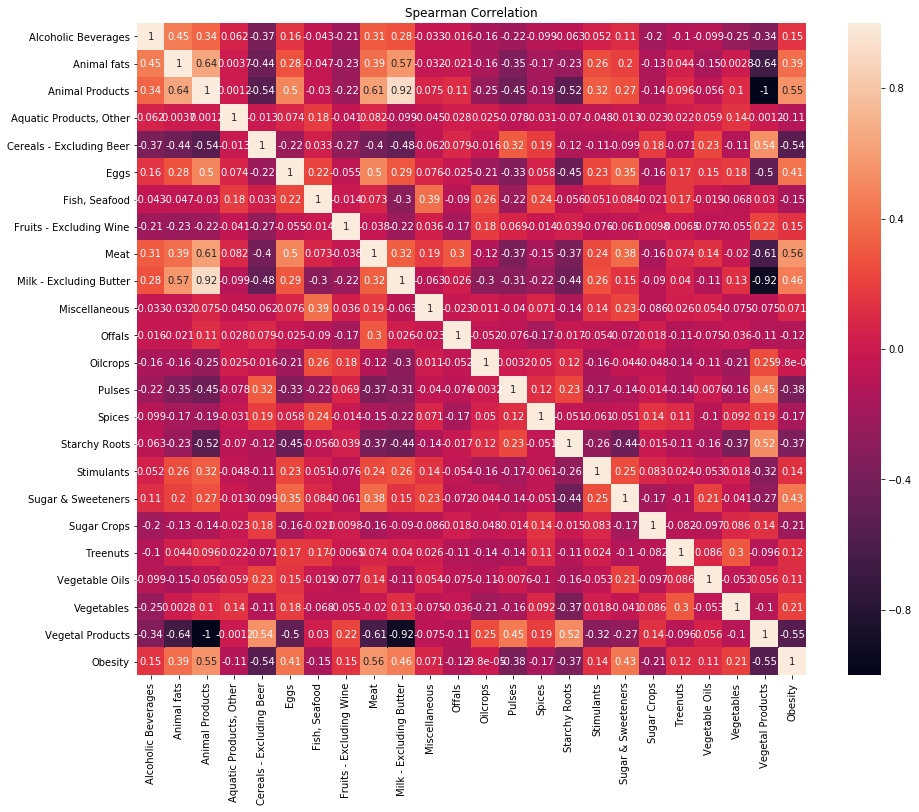

In [ ]:
#calling the function display_correlation
r_simple=display_correlation(corr_df) 

In [ ]:
alt.Chart(corr_df).mark_point().encode(
    x = 'Obesity',
    y = 'Vegetal Products'
)

alt.Chart(...)

In [ ]:


alt.Chart(corr_df).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    #color='species:N'
).properties(
    width=200,
    height=200
).repeat(
    row=['Obesity'],
    column=['Vegetal Products', 'Sugar & Sweeteners','Starchy Roots', 'Animal fats', 'Animal Products',
       'Eggs', 'Meat',
       'Milk - Excluding Butter',
       'Pulses']
)

alt.RepeatChart(...)

Observation: attributes that are correlated to the attribute 'Obesity' are Vegetable Products, Sugar&Sweetners, Starchy Roots, Pulses, Milk-excluding butter, Meat, Eggs, Animal Products, Animal Fats.

2. Correlation between diet variables and 'Undernourished'

In [ ]:
df['Undernourished'] = df['Undernourished'].map(lambda x: '2.4' if x == '<2.5' else x).astype('float64')

In [ ]:
new_df = df.drop(['Country','Active','Obesity', 'Confirmed', 'Deaths',
       'Recovered', 'Population'],axis=1)

In [ ]:
new_df.columns

Index(['Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Undernourished'],
      dtype='object')

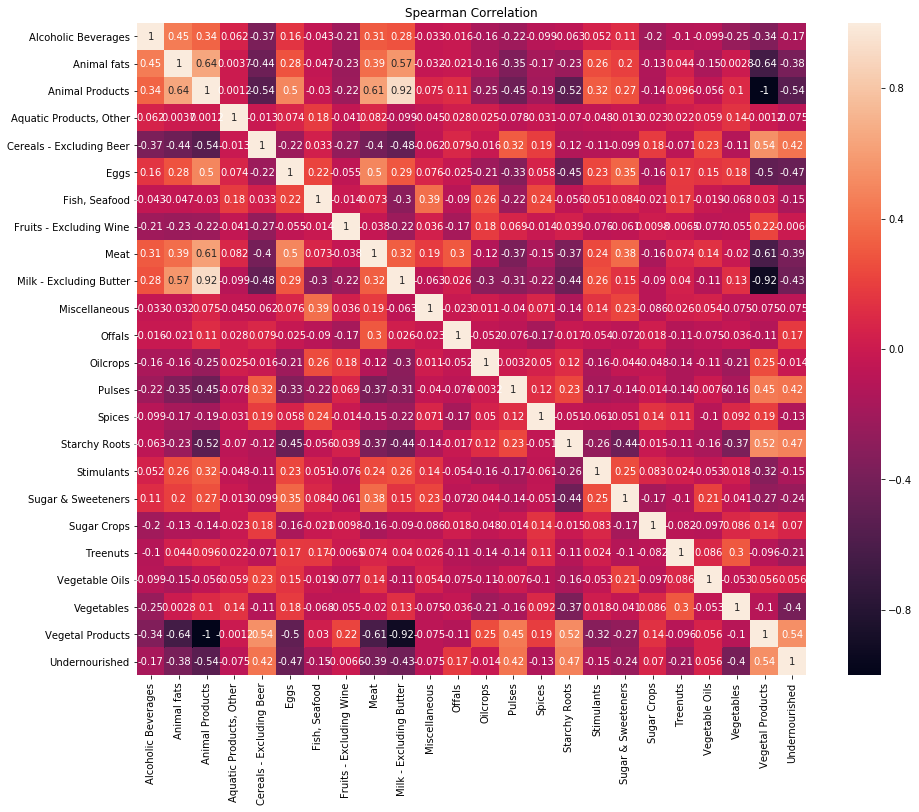

In [ ]:
nourish = display_correlation(new_df)

Observation: The variables that are highly correlated with 'Undernourished' are Vegetable products, Vegetables, Starchy Roots, Pulses, Milk-excluding butter, Meat, Eggs, Cereals, Animal Products, Animal Fats

In [ ]:
corr_df = df.drop(['Country','Active','Obesity', 'Confirmed', 'Deaths',
       'Recovered', 'Population'],axis=1)
alt.Chart(corr_df).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color=alt.value('red')
).properties(
    width=200,
    height=200
).repeat(
    row=['Undernourished'],
    column=['Vegetal Products','Fruits - Excluding Wine','Starchy Roots', 'Animal fats', 'Animal Products',
       'Eggs', 'Meat',
       'Milk - Excluding Butter',
       'Pulses']
)

alt.RepeatChart(...)

## 2. Linear Regression

In [ ]:
#separate the other attributes from the predicting attribute
x = corr_df.drop('Obesity',axis=1)
#separte the predicting attribute into Y for model training 
y = corr_df['Obesity']

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x,y)

LinearRegression()

In [ ]:
df_Obesity = df.sort_values(by="Obesity",ascending=False)
df_Obesity.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
131,Samoa,1.4236,0.2262,11.1630,0.1236,3.6768,0.1314,2.7788,10.7845,5.7993,...,0.5117,1.1656,38.8349,45.5,2.7,0.001000,0.000000,0.001000,0.000000,200000.0
161,United States of America,4.8647,0.1681,21.2352,0.0020,5.5048,0.7860,1.1287,4.5432,6.2645,...,0.9889,5.7249,28.7587,37.3,2.4,8.159922,0.140103,0.000000,8.019819,329878000.0
83,Kuwait,0.0044,0.0022,10.7213,0.0022,11.4132,1.3306,0.8343,5.3058,4.8770,...,1.1976,12.9953,39.2750,37.0,2.8,3.624728,0.020550,3.434087,0.170092,4691000.0
133,Saudi Arabia,0.0000,0.3917,12.9962,0.0000,16.3284,0.6003,1.0369,7.0413,4.9529,...,1.7626,5.7024,37.0038,35.0,7.1,1.055795,0.018256,1.030898,0.006641,35041000.0
77,Jordan,0.0846,0.1162,9.3186,0.0000,14.1380,0.3344,0.5985,4.6624,3.8651,...,1.9861,10.6308,40.6798,33.4,12.2,3.126276,0.040912,2.991760,0.093604,10679000.0


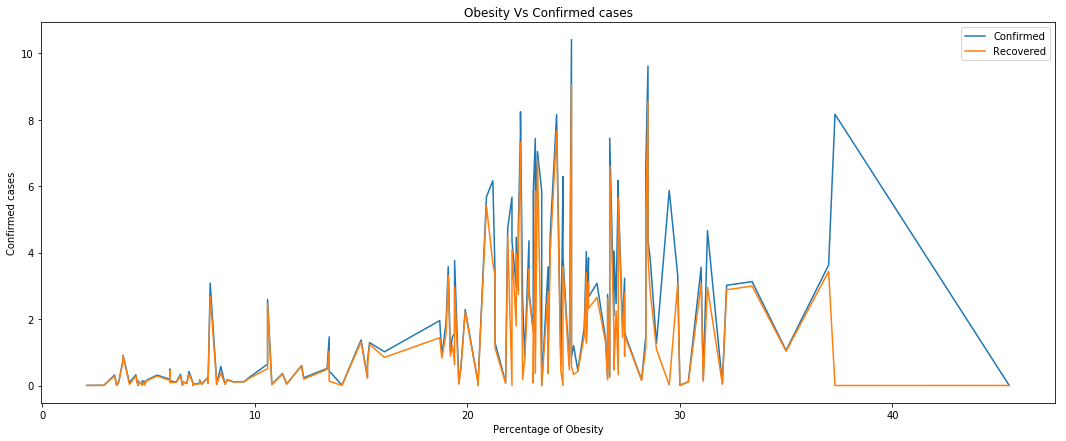

In [ ]:
df_Obesity = df.sort_values(by="Obesity",ascending=False)
plt.figure(figsize=(40, 7))
plt.subplot(1,2,1)

plt.plot(df_Obesity["Obesity"],df_Obesity["Confirmed"], label="Confirmed")
plt.plot(df_Obesity["Obesity"],df_Obesity["Recovered"], label="Recovered")

plt.title('Obesity Vs Confirmed cases')
plt.xlabel('Percentage of Obesity')
plt.ylabel('Confirmed cases')
plt.legend(loc='best')

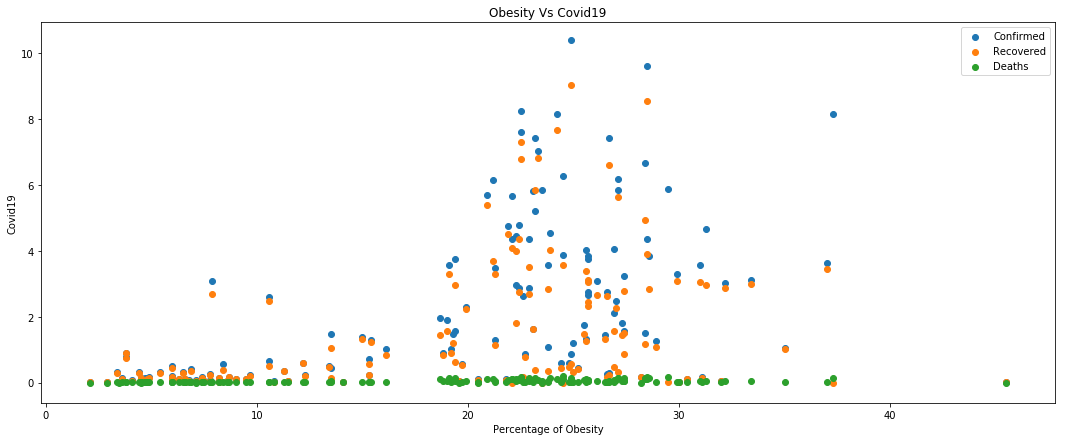

In [ ]:
plt.figure(figsize=(40, 7))
plt.subplot(1,2,1)
plt.scatter(df["Obesity"],df["Confirmed"],label="Confirmed")
plt.scatter(df["Obesity"],df["Recovered"], label="Recovered")
plt.scatter(df["Obesity"],df["Deaths"], label="Deaths")

plt.title('Obesity Vs Covid19')
plt.xlabel('Percentage of Obesity')
plt.ylabel('Covid19')
plt.legend(loc='best')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4FD7D6630>],
      dtype=object)

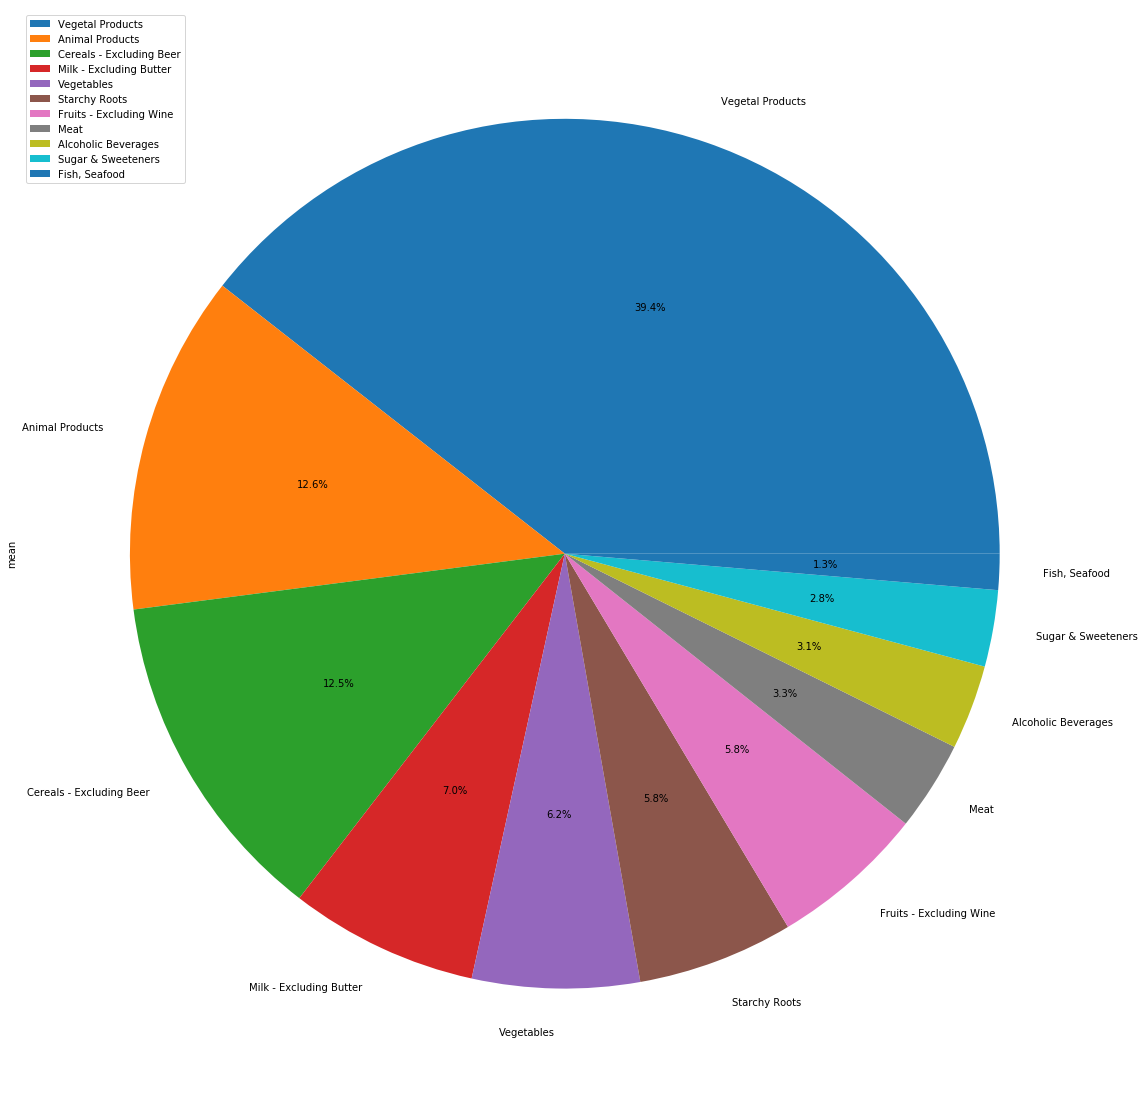

In [ ]:
#A look into overall eating food sources
diet_mean = df.describe().iloc[1]
diet_mean = pd.DataFrame(diet_mean).drop(['Deaths', 'Population','Undernourished','Obesity', 'Recovered', 'Confirmed', 'Active'], axis=0)
diet_mean = diet_mean.sort_values(by='mean', ascending=False).iloc[:11]
diet_mean.plot.pie(subplots=True, figsize=(20, 20), autopct='%1.1f%%')

In [ ]:
df_Undernourished = df.sort_values(by="Undernourished", ascending = False)
df_Undernourished.head(10)

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
27,Central African Republic,1.7435,0.1228,6.9032,0.0000,3.8844,0.0510,0.8041,4.5543,3.7346,...,0.7240,1.9214,43.0942,6.3,59.6,0.103292,0.001304,0.101139,0.000849,4830000.0
169,Zimbabwe,4.0552,0.0755,8.1489,0.0000,22.6240,0.2678,0.5518,2.2000,2.6142,...,1.7103,2.3213,41.8526,12.3,51.3,0.232033,0.008854,0.190964,0.032214,14863000.0
64,Haiti,1.2733,0.0402,3.5986,0.0000,13.4196,0.0525,0.5064,12.0278,1.9687,...,0.8742,2.0302,46.3997,20.5,49.3,0.103113,0.002149,0.080295,0.020670,11403000.0
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,0.6657,3.4649,43.9789,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0
92,Madagascar,0.7972,0.0415,4.9125,0.0024,19.9604,0.0770,0.6267,5.0701,1.4618,...,0.3115,1.8871,45.0869,4.5,44.4,0.068849,0.001015,0.065779,0.002055,27691000.0
156,Uganda,6.1671,0.0352,5.6473,0.0000,6.7480,0.0815,1.0442,11.3112,0.8978,...,0.7440,2.6703,44.3536,4.1,41.0,0.087058,0.000715,0.031370,0.054973,45741000.0
32,Congo,4.9612,0.0122,6.1258,0.0000,6.2564,0.0457,2.3945,4.0015,3.2735,...,0.6700,2.5520,43.8709,8.4,40.3,0.571675,0.014516,0.379721,0.177437,5518000.0
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,1.0811,3.2135,44.2126,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0
28,Chad,0.8297,0.2023,12.2804,0.0000,21.6017,0.0495,1.0451,1.0669,3.8543,...,0.4556,0.9141,37.7189,4.8,37.5,0.020578,0.000741,0.016881,0.002957,16877000.0
89,Liberia,1.0338,0.0264,3.7603,0.0000,16.1465,0.1598,0.7764,5.3606,2.4123,...,1.9567,3.1728,46.2383,8.6,37.2,0.038671,0.001661,0.034994,0.002017,5058000.0


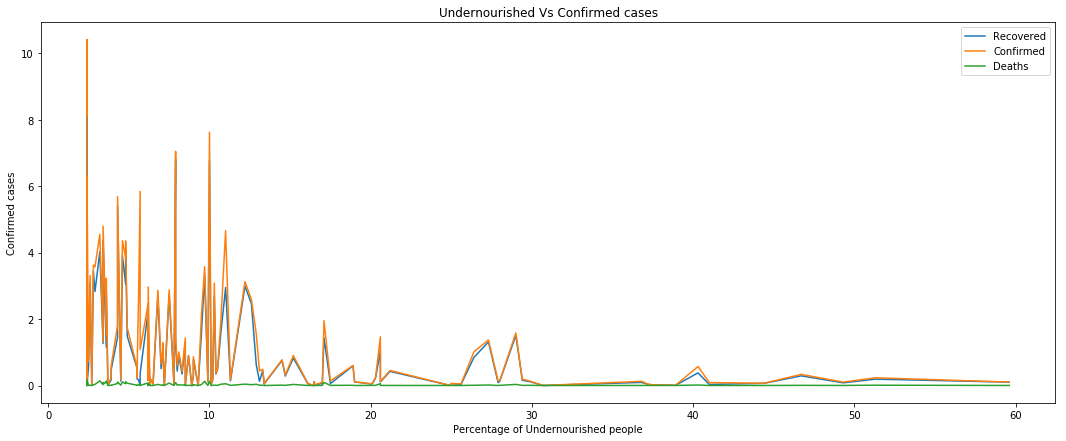

In [ ]:
#We can clearly see the correlation between obesity nd spread of covid 19 from the plots
#Let's analyse the feature "Undernourished" like we did with obesity
plt.figure(figsize=(40, 7))
plt.subplot(1,2,1)
plt.plot(df_Undernourished["Undernourished"],df_Undernourished["Recovered"],label="Recovered")
plt.plot(df_Undernourished["Undernourished"],df_Undernourished["Confirmed"],label="Confirmed")
plt.plot(df_Undernourished["Undernourished"],df_Undernourished["Deaths"],label="Deaths")
#plt.scatter(df_Obesity["Obesity"],df_Obesity["Recovered"], label="Confirmed")

plt.title('Undernourished Vs Confirmed cases')
plt.xlabel('Percentage of Undernourished people')
plt.ylabel('Confirmed cases')
plt.legend(loc='best')

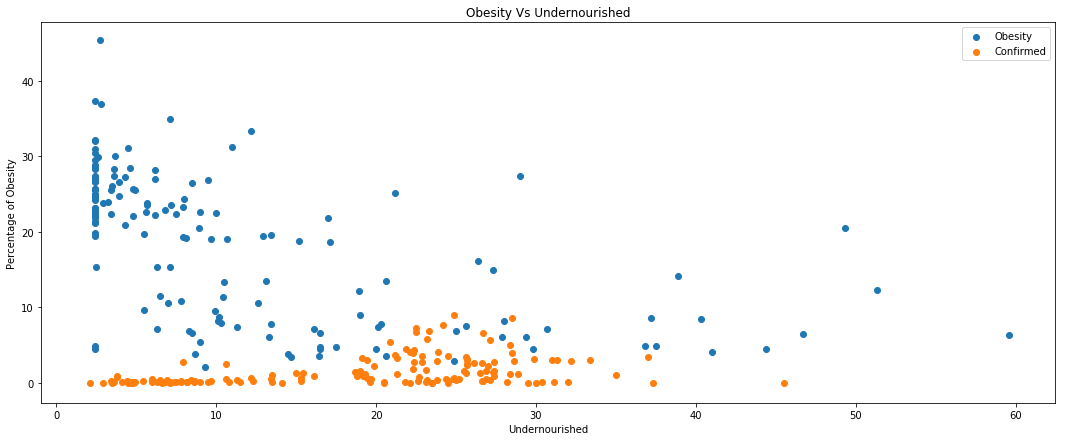

In [ ]:
#On the contrary to the popular belief countries who are undernourished seems to have smaller cases.
#There could be many factors like low lifespan associated with it.
#Let's see something.
plt.figure(figsize=(40, 7))
plt.subplot(1,2,1)

plt.scatter(df_Undernourished["Undernourished"],df_Undernourished["Obesity"])
plt.scatter(df_Obesity["Obesity"],df_Obesity["Recovered"], label="Confirmed")

plt.title('Obesity Vs Undernourished')
plt.ylabel('Percentage of Obesity')
plt.xlabel('Undernourished')
plt.legend(loc='best')